array([[[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       ...,

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]],

       [[100, 100, 100],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [100, 100, 100],
        [100, 100, 100],
        [100, 100, 100]]], dtype=uint8)
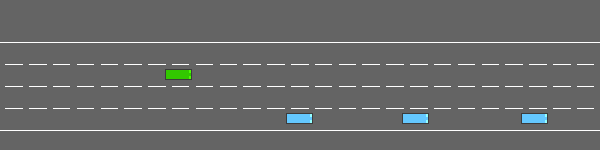

In [ ]:
import gymnasium as gym
import highway_env

env = gym.make("highway-v0", render_mode = "rgb_array")
obs, _ = env.reset()
env.render()

In [ ]:
#  Step 1: Install only what's needed
!pip install -q highway-env stable-baselines3[extra] moviepy




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 15.8 MB/s eta 0:00:00


I have added a cell to install the `highway-env` and `stable-baselines3` libraries. Please run this cell before running the training code.

In [ ]:
# Step 2: Imports
import gymnasium as gym
import highway_env
import numpy as np
import matplotlib.pyplot as plt
import os
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecVideoRecorder
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:

#  Step 3: Reward logger
class RewardLogger(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []

    def _on_step(self) -> bool:
        if self.locals.get("dones") is not None:
            for i, done in enumerate(self.locals["dones"]):
                if done:
                    reward = self.locals["infos"][i].get("episode", {}).get("r")
                    if reward is not None:
                        self.episode_rewards.append(reward)
        return True

In [ ]:
#  Step 4: Minimal environment config
env_config = {
    "observation": {"type": "Kinematics"},
    "vehicles_count": 5,
    "duration": 25,
    "policy_frequency": 5,
    "simulation_frequency": 15
}
env = gym.make("highway-v0", render_mode="rgb_array", config=env_config)

env = Monitor(env)

In [ ]:

#  Step 5: PPO model setup (no verbose)
model = PPO("MlpPolicy", env, verbose=0)
reward_logger = RewardLogger()

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [ ]:

#  Step 6: Quick training (short timesteps)
model.learn(total_timesteps=100_000, callback=reward_logger)


/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = utils.lmap(df[feature], [f_range[0], f_range[1]], [-1, 1])
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.clip(df[feature], -1, 1)
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:228: SettingWithCopyWarning: 
A value is trying to be set 

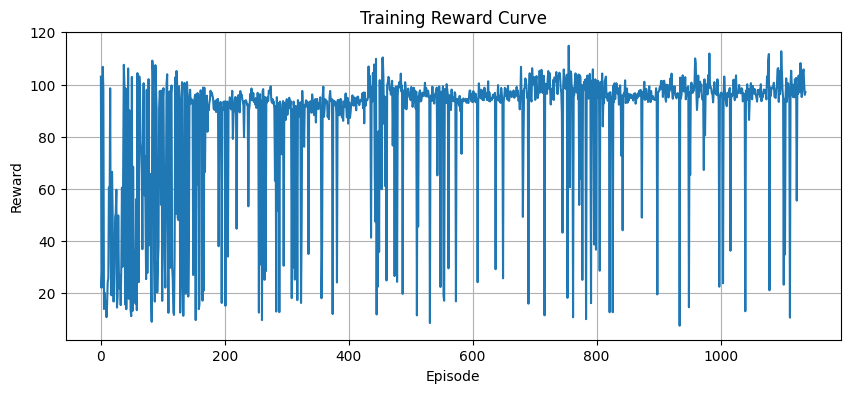

In [ ]:

# Step 7: Plot reward curve
plt.figure(figsize=(10, 4))
plt.plot(reward_logger.episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Curve")
plt.grid(True)
plt.show()


In [ ]:

#  Step 8: Record and show short video
video_folder = "./videos/"
video_length = 1000
os.makedirs(video_folder, exist_ok=True)

vec_env = DummyVecEnv([lambda: gym.make("highway-v0", render_mode="rgb_array", config=env_config)]) # Apply config here
vec_env = VecVideoRecorder(
    vec_env,
    video_folder=video_folder,
    record_video_trigger=lambda x: x == 0,
    video_length=video_length,
    name_prefix="ppo-highway"
)

obs = vec_env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs)
    obs, _, done, _ = vec_env.step(action)
    if done:
        obs = vec_env.reset()

vec_env.close()


Saving video to /content/videos/ppo-highway-step-0-to-step-1000.mp4
Moviepy - Building video /content/videos/ppo-highway-step-0-to-step-1000.mp4.
Moviepy - Writing video /content/videos/ppo-highway-step-0-to-step-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/ppo-highway-step-0-to-step-1000.mp4


In [ ]:

#  Step 9: Display video inline
import glob
from IPython.display import HTML
from base64 import b64encode

video_path = glob.glob(f"{video_folder}/*.mp4")[0]
mp4 = open(video_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"<video width=600 controls><source src='{data_url}' type='video/mp4'></video>")

In [1]:
# !pip install -U sympy